Predicted Machine Failure: 0.6666666666666666


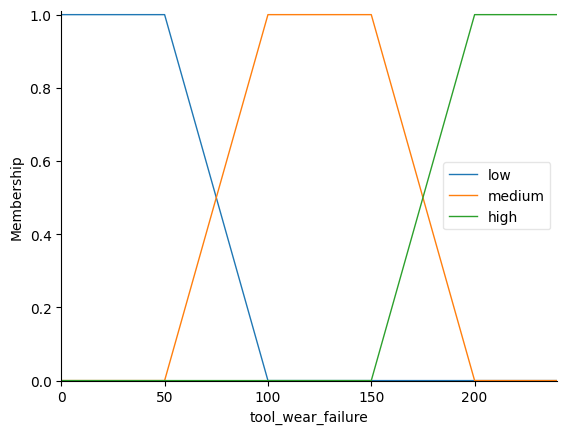

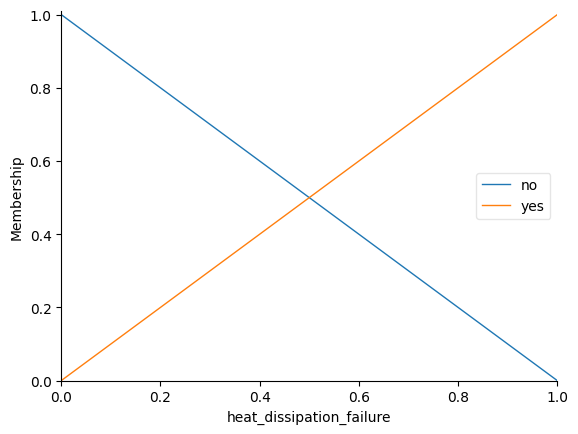

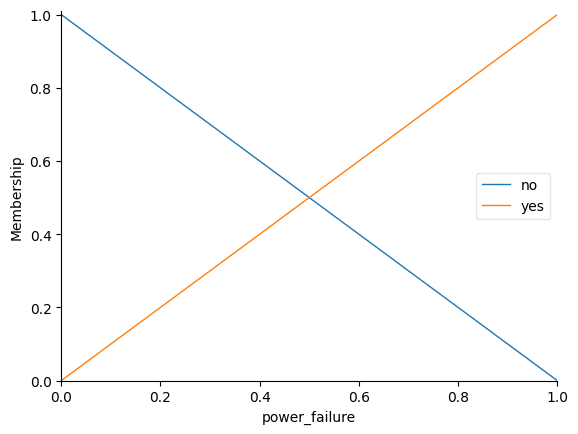

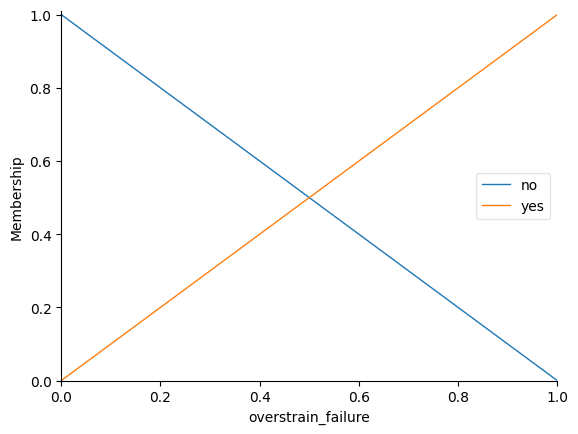

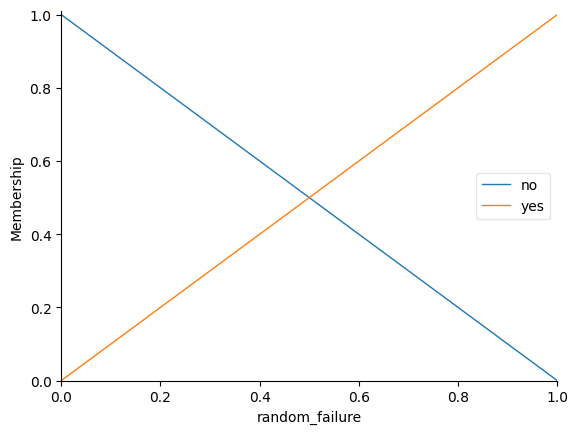

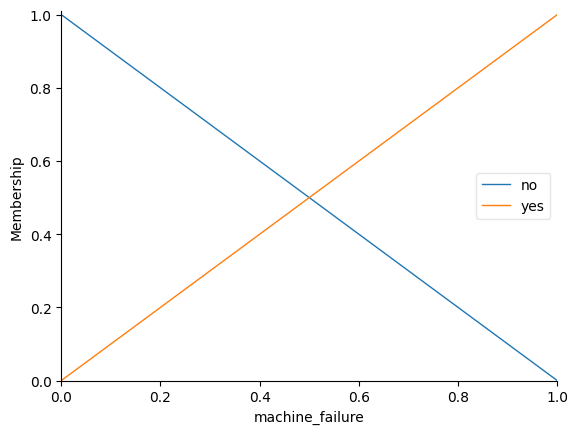

In [4]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')



# Run simulation for sample data
sample_data = dataset.iloc[0]  # Taking the first row as sample data

# Pass input values to the simulation
machine_failure_simulation.input['tool_wear_failure'] = sample_data['Tool wear [min]']
machine_failure_simulation.input['heat_dissipation_failure'] = 1 if sample_data['Air temperature [K]'] - sample_data['Process temperature [K]'] < 8.6 and sample_data['Rotational speed [rpm]'] < 1380 else 0
machine_failure_simulation.input['power_failure'] = 1 if sample_data['Torque [Nm]'] * sample_data['Rotational speed [rpm]'] < 3500 or sample_data['Torque [Nm]'] * sample_data['Rotational speed [rpm]'] > 9000 else 0
machine_failure_simulation.input['overstrain_failure'] = 1 if sample_data['Tool wear [min]'] * sample_data['Torque [Nm]'] > 11000 else 0
machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

# Compute the output
machine_failure_simulation.compute()

# Print the predicted machine failure
print("Predicted Machine Failure:", machine_failure_simulation.output['machine_failure'])

# Visualize the fuzzy control system
tool_wear_failure.view()
heat_dissipation_failure.view()
power_failure.view()
overstrain_failure.view()
random_failure.view()
machine_failure.view()

In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

# Define fuzzy variables
air_temperature = ctrl.Antecedent(np.arange(298, 299, 0.1), 'air_temperature')
process_temperature = ctrl.Antecedent(np.arange(308, 309, 0.1), 'process_temperature')
rotational_speed = ctrl.Antecedent(np.arange(1400, 1600, 1), 'rotational_speed')
torque = ctrl.Antecedent(np.arange(39, 50, 0.1), 'torque')
tool_wear = ctrl.Antecedent(np.arange(0, 11, 1), 'tool_wear')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
# Air temperature
air_temperature['low'] = fuzz.trimf(air_temperature.universe, [298, 298, 298.5])
air_temperature['high'] = fuzz.trimf(air_temperature.universe, [298.4, 298.9, 299])

# Process temperature
process_temperature['low'] = fuzz.trimf(process_temperature.universe, [308, 308, 308.5])
process_temperature['high'] = fuzz.trimf(process_temperature.universe, [308.4, 308.9, 309])

# Rotational speed
rotational_speed['low'] = fuzz.trimf(rotational_speed.universe, [1400, 1400, 1500])
rotational_speed['high'] = fuzz.trimf(rotational_speed.universe, [1450, 1550, 1600])

# Torque
torque['low'] = fuzz.trimf(torque.universe, [39, 39, 44])
torque['high'] = fuzz.trimf(torque.universe, [42, 47, 50])

# Tool wear
tool_wear['low'] = fuzz.trimf(tool_wear.universe, [0, 0, 5])
tool_wear['high'] = fuzz.trimf(tool_wear.universe, [3, 8, 10])

# Machine failure
machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 1])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(air_temperature['low'] | process_temperature['low'] | rotational_speed['low'] | torque['low'] | tool_wear['high'], machine_failure['yes'])
rule2 = ctrl.Rule(air_temperature['high'] | process_temperature['high'] | rotational_speed['high'] | torque['high'] | tool_wear['low'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for sample data
sample_data = dataset.iloc[0]  # Taking the first row as sample data

# Pass input values to the simulation
machine_failure_simulation.input['air_temperature'] = sample_data['Air temperature [K]']
machine_failure_simulation.input['process_temperature'] = sample_data['Process temperature [K]']
machine_failure_simulation.input['rotational_speed'] = sample_data['Rotational speed [rpm]']
machine_failure_simulation.input['torque'] = sample_data['Torque [Nm]']
machine_failure_simulation.input['tool_wear'] = sample_data['Tool wear [min]']

# Compute the output
machine_failure_simulation.compute()

# Print the predicted machine failure
print("Predicted Machine Failure:", machine_failure_simulation.output['machine_failure'])

# Visualize the fuzzy control system
air_temperature.view()
process_temperature.view()
rotational_speed.view()
torque.view()
tool_wear.view()
machine_failure.view()

FileNotFoundError: [Errno 2] No such file or directory: 'ai4i2020.csv'